# Bước 2: Kỹ thuật tạo Features cho Phân khúc khách hàng

Notebook này tạo các features ở cấp độ khách hàng từ dữ liệu bán lẻ đã được làm sạch để phân tích phân khúc khách hàng.

## Mục tiêu

1. Tạo các features tổng hợp ở cấp độ khách hàng
2. Xử lý các giá trị ngoại lai trong dữ liệu
3. Áp dụng các phép biến đổi để chuẩn hóa phân phối features
4. Chuẩn hóa features cho clustering
5. Lưu các features đã xử lý để modeling

Mục tiêu là tạo ra các features có ý nghĩa để nắm bắt các khía cạnh khác nhau của hành vi mua hàng của khách hàng.

In [1]:
%load_ext autoreload
%autoreload 2

# Import thư viện
import sys
sys.path.append('../src')

from clustering_library import FeatureEngineer
import matplotlib.pyplot as plt
import seaborn as sns

# Cài đặt style cho matplotlib và seaborn
plt.style.use("seaborn-v0_8-whitegrid")
sns.set_palette("viridis")

## Tải dữ liệu đã làm sạch

In [2]:
# Tải dữ liệu UK đã được làm sạch
data_path = '../data/processed/cleaned_uk_data.csv'

# Khởi tạo feature engineer và tải dữ liệu
engineer = FeatureEngineer(data_path)
df = engineer.load_data()
df.head()

d:\CustomerSegmentationn\notebooks\../src\clustering_library.py:198: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  self.df = pd.read_csv(self.data_path)


Kích thước dữ liệu: (485123, 11)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,DayOfWeek,HourOfDay
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,017850,United Kingdom,15.30,2,8
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,017850,United Kingdom,22.00,2,8
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,017850,United Kingdom,20.34,2,8


## Tạo Features ở cấp độ khách hàng

In [3]:
print(f"Tổng số features sẽ tạo: {len(engineer.feature_customer)}")
print("Danh sách features:")
for i, feature in enumerate(engineer.feature_customer, 1):
    print(f"{i:2d}. {feature}")

Tổng số features sẽ tạo: 16
Danh sách features:
 1. Sum_Quantity
 2. Mean_UnitPrice
 3. Mean_TotalPrice
 4. Sum_TotalPrice
 5. Count_Invoice
 6. Count_Stock
 7. Mean_InvoiceCountPerStock
 8. Mean_StockCountPerInvoice
 9. Mean_UnitPriceMeanPerInvoice
10. Mean_QuantitySumPerInvoice
11. Mean_TotalPriceMeanPerInvoice
12. Mean_TotalPriceSumPerInvoice
13. Mean_UnitPriceMeanPerStock
14. Mean_QuantitySumPerStock
15. Mean_TotalPriceMeanPerStock
16. Mean_TotalPriceSumPerStock


In [4]:
# Tạo customer-level features
customer_features = engineer.create_customer_features()
customer_features.head()

Đang tính toán features cho từng khách hàng...
Đã xử lý 500/3921 khách hàng...
Đã xử lý 1000/3921 khách hàng...
Đã xử lý 1500/3921 khách hàng...
Đã xử lý 2000/3921 khách hàng...
Đã xử lý 2500/3921 khách hàng...
Đã xử lý 3000/3921 khách hàng...
Đã xử lý 3500/3921 khách hàng...
✓ Hoàn thành tính toán features!


,CustomerID,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
0,000nan,405650.0,6.248856,13.125415,1716830.53,1373.0,3401.0,38.459865,95.267298,34.401125,295.447924,41.005373,1250.422819,10.903397,119.273743,14.841714,504.801685
1,012346,74215.0,1.040000,77183.600000,77183.60,1.0,1.0,1.000000,1.000000,1.040000,74215.000000,77183.600000,77183.600000,1.040000,74215.000000,77183.600000,77183.600000
2,012747,1275.0,4.367864,40.737961,4196.01,11.0,42.0,2.452381,9.363636,4.253949,115.909091,43.645453,381.455455,4.844583,30.357143,27.983690,99.905000
3,012748,25747.0,2.656279,7.338353,33719.73,209.0,1768.0,2.598982,21.985646,8.916506,123.191388,16.378101,161.338421,2.726409,14.562783,8.176556,19.072245
4,012749,1471.0,4.999950,20.557186,4090.88,5.0,160.0,1.243750,39.800000,5.095433,294.200000,21.871511,818.176000,4.785563,9.193750,20.025448,25.568000


### Mô tả Features

16 features ở cấp độ khách hàng nắm bắt các khía cạnh khác nhau của hành vi mua hàng:

**Chỉ số cơ bản:**
* 1. `Sum_Quantity`: Tổng số lượng sản phẩm đã mua
* 2. `Mean_UnitPrice`: Giá trung bình trên mỗi đơn vị trong tất cả lần mua
* 3. `Mean_TotalPrice`: Số tiền trung bình mỗi giao dịch
* 4. `Sum_TotalPrice`: Tổng số tiền đã chi (giá trị vòng đời khách hàng)
* 5. `Count_Invoice`: Số lượng giao dịch duy nhất
* 6. `Count_Stock`: Số lượng sản phẩm duy nhất đã mua

**Tổng hợp theo sản phẩm:**
* 7. `Mean_InvoiceCountPerStock`: Tần suất mua trung bình trên mỗi sản phẩm
* 8. `Mean_StockCountPerInvoice`: Số lượng sản phẩm khác nhau trung bình mỗi giao dịch

**Tổng hợp theo hóa đơn:**
* 9. `Mean_UnitPriceMeanPerInvoice`: Giá đơn vị trung bình mỗi giao dịch
* 10. `Mean_QuantitySumPerInvoice`: Số lượng trung bình mỗi giao dịch
* 11. `Mean_TotalPriceMeanPerInvoice`: Số tiền trung bình mỗi sản phẩm trong giao dịch
* 12. `Mean_TotalPriceSumPerInvoice`: Tổng chi tiêu trung bình mỗi giao dịch

**Tổng hợp theo loại sản phẩm:**
* 13. `Mean_UnitPriceMeanPerStock`: Mức giá trung bình trên mỗi sản phẩm
* 14. `Mean_QuantitySumPerStock`: Số lượng trung bình đã mua trên mỗi sản phẩm
* 15. `Mean_TotalPriceMeanPerStock`: Chi tiêu trung bình trên mỗi sản phẩm
* 16. `Mean_TotalPriceSumPerStock`: Tổng chi tiêu trung bình trên mỗi sản phẩm

Các features này giúp xác định các phân khúc khách hàng khác nhau dựa trên mẫu mua hàng của họ.

In [5]:
# Hiển thị thông tin features đã tạo
print(f"Features được tạo thành công:")
print(f"- Số khách hàng: {customer_features.shape[0]:,}")
print(f"- Số features: {customer_features.shape[1] - 1}")

customer_features.set_index('CustomerID').describe().round(2)

Features được tạo thành công:
- Số khách hàng: 3,921
- Số features: 16


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
count,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00,3921.00
mean,1189.08,4.46,71.74,2301.77,4.60,61.58,1.28,21.96,4.95,243.13,82.41,393.43,4.54,59.29,70.73,94.59
std,7463.77,35.96,1543.78,28391.37,23.01,97.54,0.80,20.14,36.85,1373.06,1840.84,1869.77,36.38,1277.18,1543.70,1665.21
min,1.00,0.12,2.10,3.75,1.00,1.00,1.00,1.00,0.12,1.00,2.10,3.45,0.12,1.00,2.14,2.23
25%,154.00,2.15,11.20,300.36,1.00,15.00,1.00,9.00,2.16,90.30,12.49,174.40,2.15,6.54,10.75,13.27
50%,365.00,2.85,17.28,652.74,2.00,35.00,1.10,16.77,2.91,156.67,17.84,281.62,2.87,11.22,17.06,19.40
75%,951.00,3.74,24.39,1578.67,5.00,77.00,1.32,28.00,3.85,262.00,26.76,409.61,3.71,17.89,23.43,30.45
max,405650.00,2033.10,77183.60,1716830.53,1373.00,3401.00,38.46,300.65,2033.10,74215.00,84235.52,84236.25,2033.10,74215.00,77183.60,77183.60


## Biến đổi Features

Để chuẩn bị features cho clustering, chúng ta sẽ áp dụng Box-Cox transformation để chuẩn hóa phân phối dữ liệu.

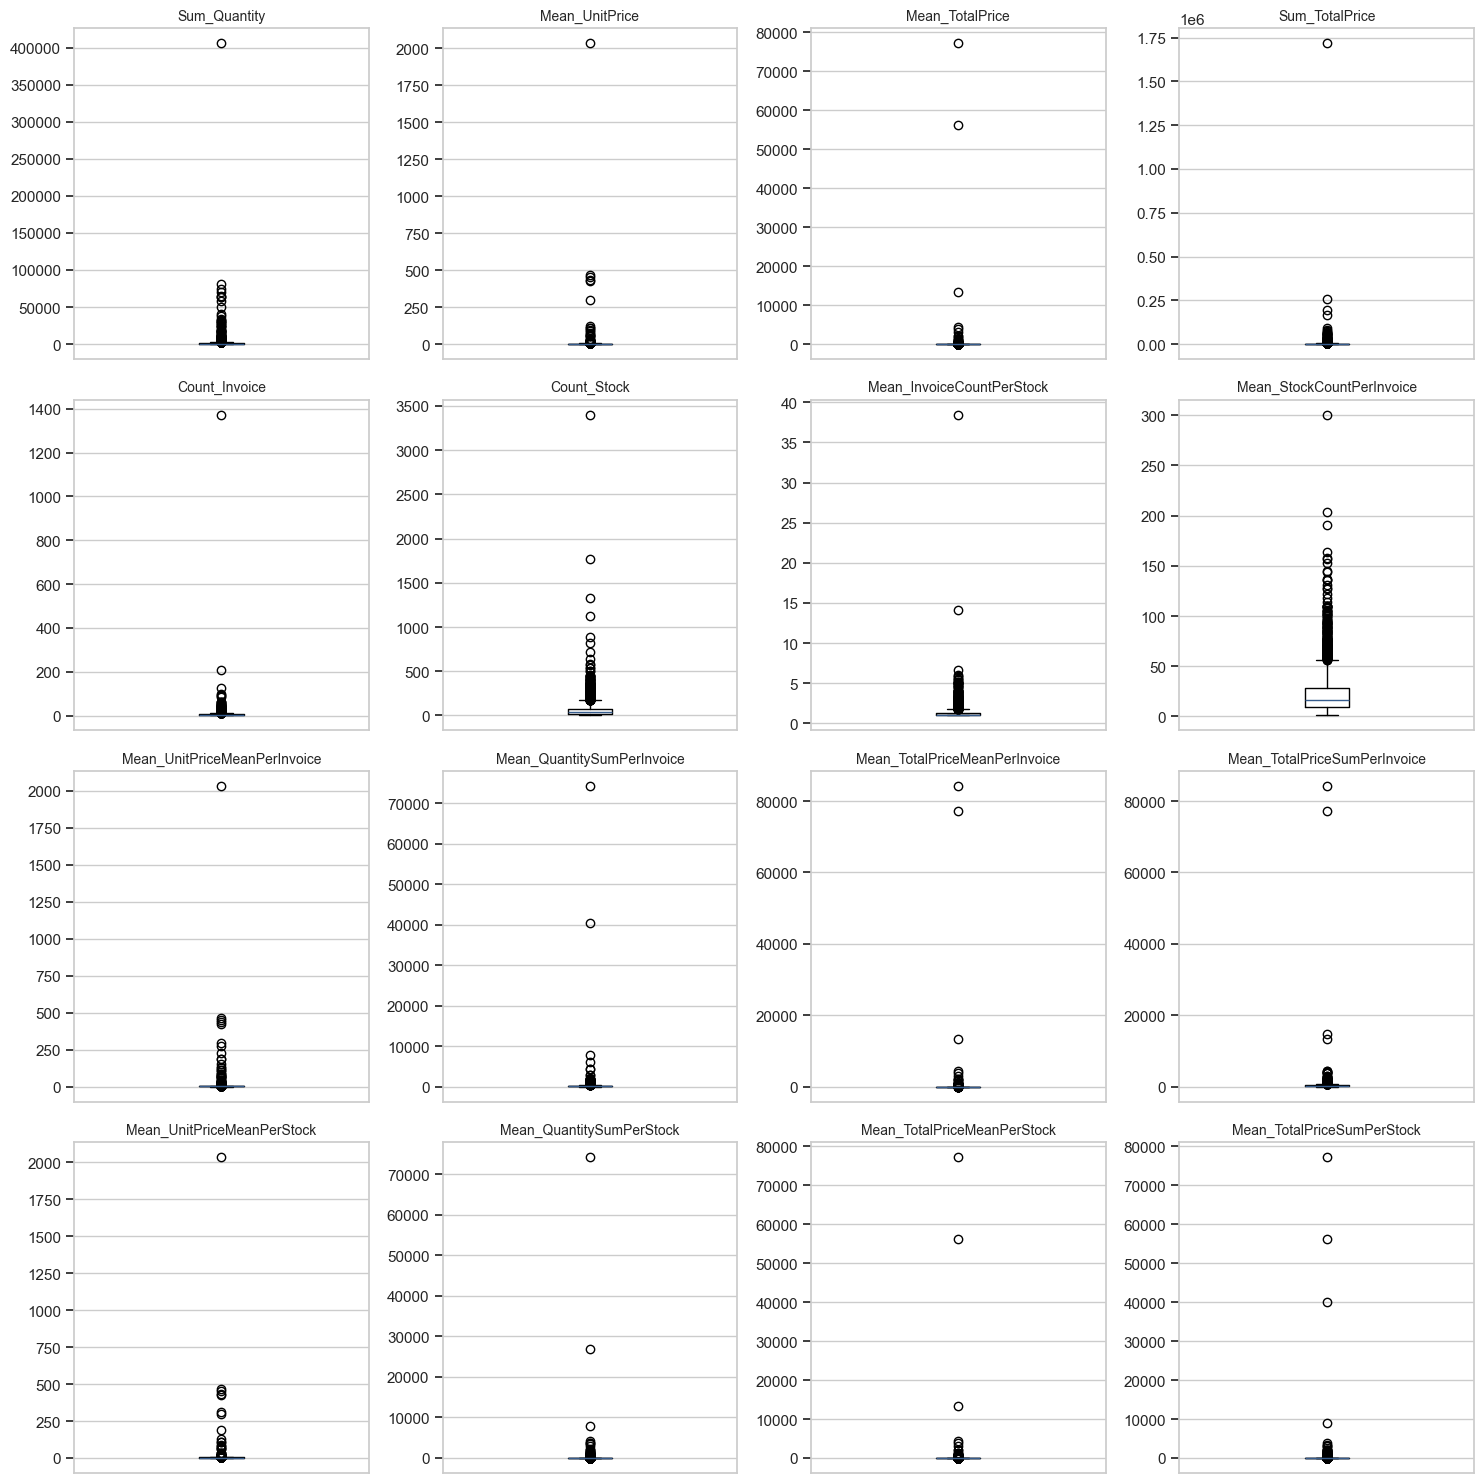

In [6]:
# Trực quan hóa tất cả features trước Box-Cox transformation
engineer.plot_features_boxplots(transformed=False)

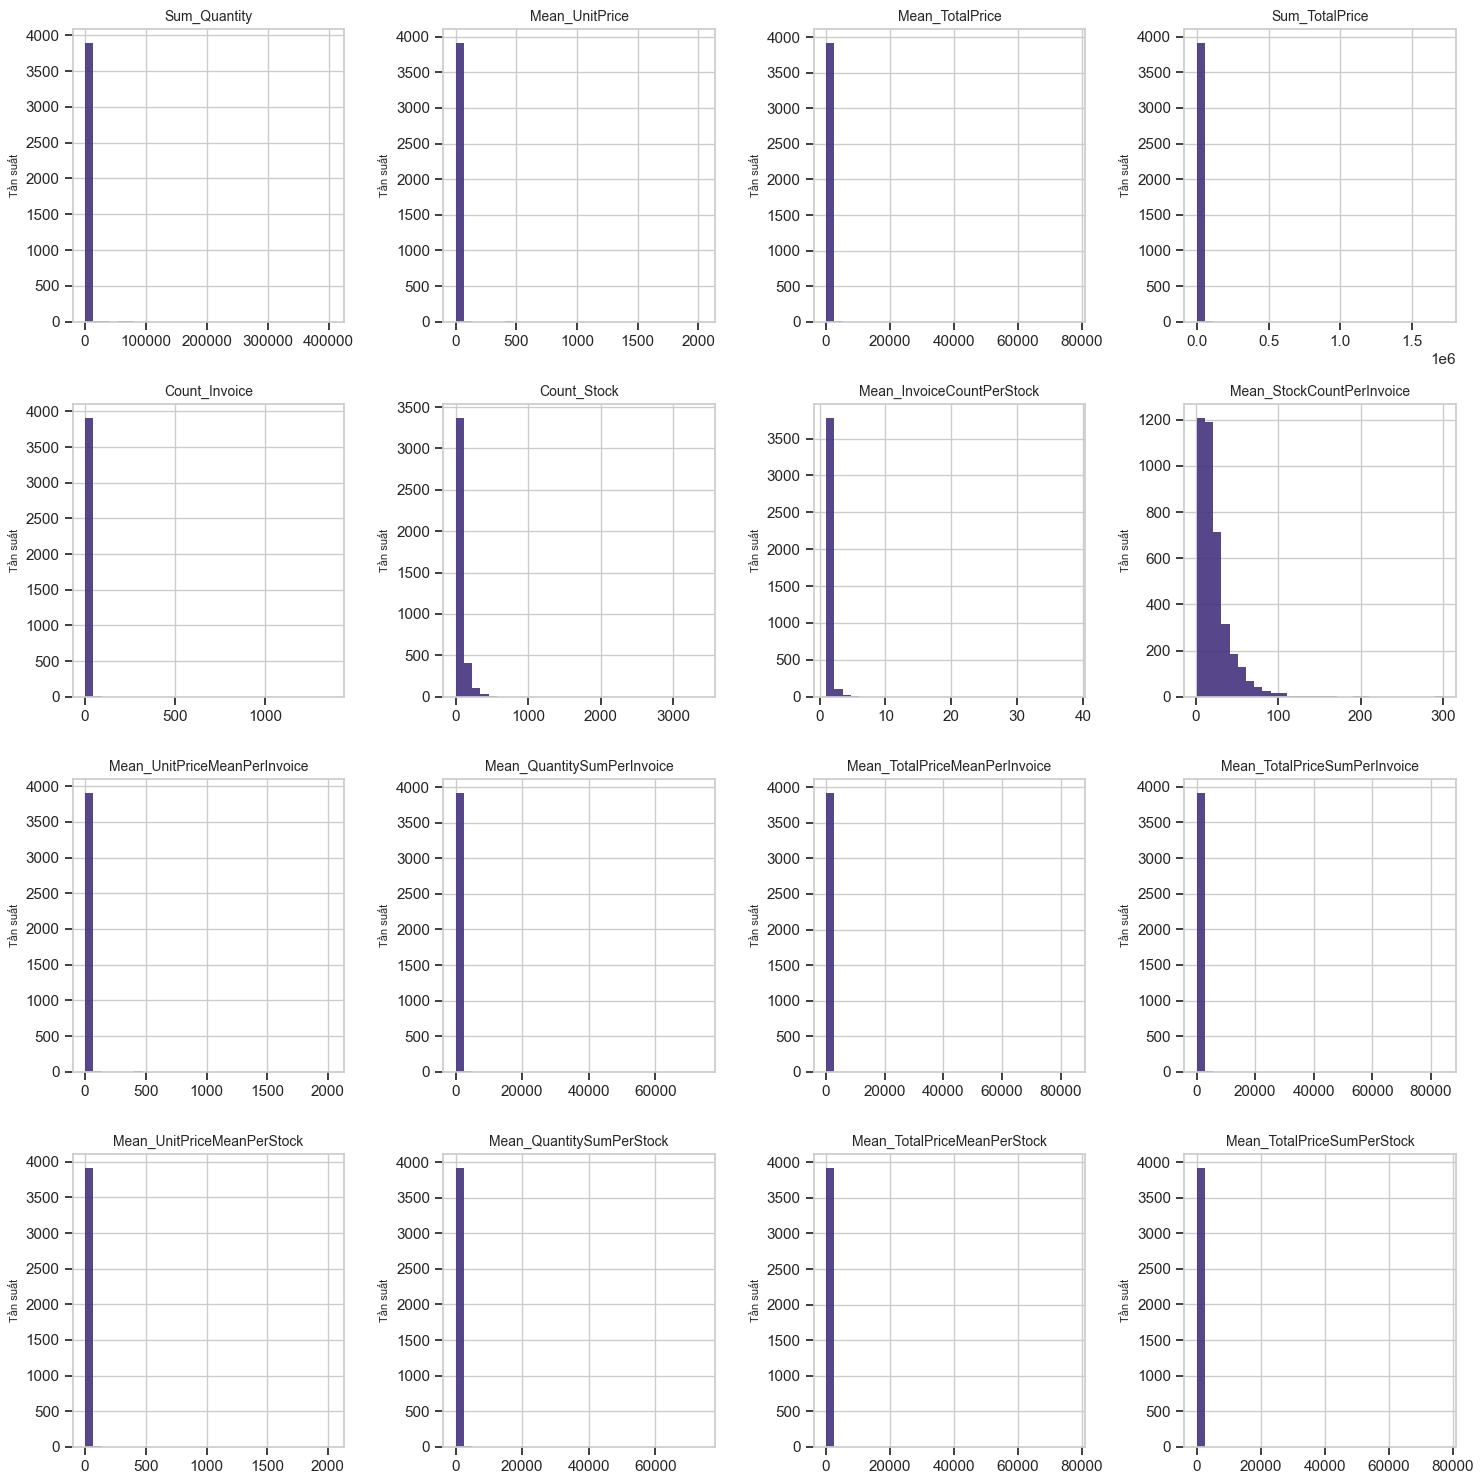

In [7]:
# Trực quan hóa phân phối của tất cả features bằng histograms
engineer.plot_features_histograms(transformed=False)

In [8]:
# Áp dụng Box-Cox transformation để chuẩn hóa phân phối features
customer_features_transformed = engineer.transform_features()
customer_features_transformed.head()

Đang áp dụng Box-Cox transformation...
✓ Box-Cox transformation hoàn thành!


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,12.418279,1.154552,1.783960,8.054674,1.308770,11.165280,0.164071,6.206762,1.366120,7.068362,2.192765,6.566697,1.271492,2.331470,1.804801,2.531434
012346,10.840137,0.579166,3.032064,7.072794,0.538659,0.711290,0.161671,0.724852,0.568083,17.423099,3.072899,9.889452,0.577185,2.816569,2.926912,2.798045
012747,6.997907,1.055109,2.175213,5.864822,1.115795,4.338777,0.163985,2.726268,1.005987,5.701499,2.211284,5.550015,1.076986,2.007588,2.022440,2.287020
012748,9.848243,0.898647,1.538424,6.760862,1.291683,9.997861,0.164005,3.857781,1.178474,5.787455,1.880484,4.797239,0.901924,1.768302,1.566559,1.856004
012749,7.134646,1.094081,1.952969,5.852844,0.978016,6.172607,0.162880,4.747467,1.053063,7.061952,1.987163,6.206524,1.073548,1.592866,1.912260,1.949339


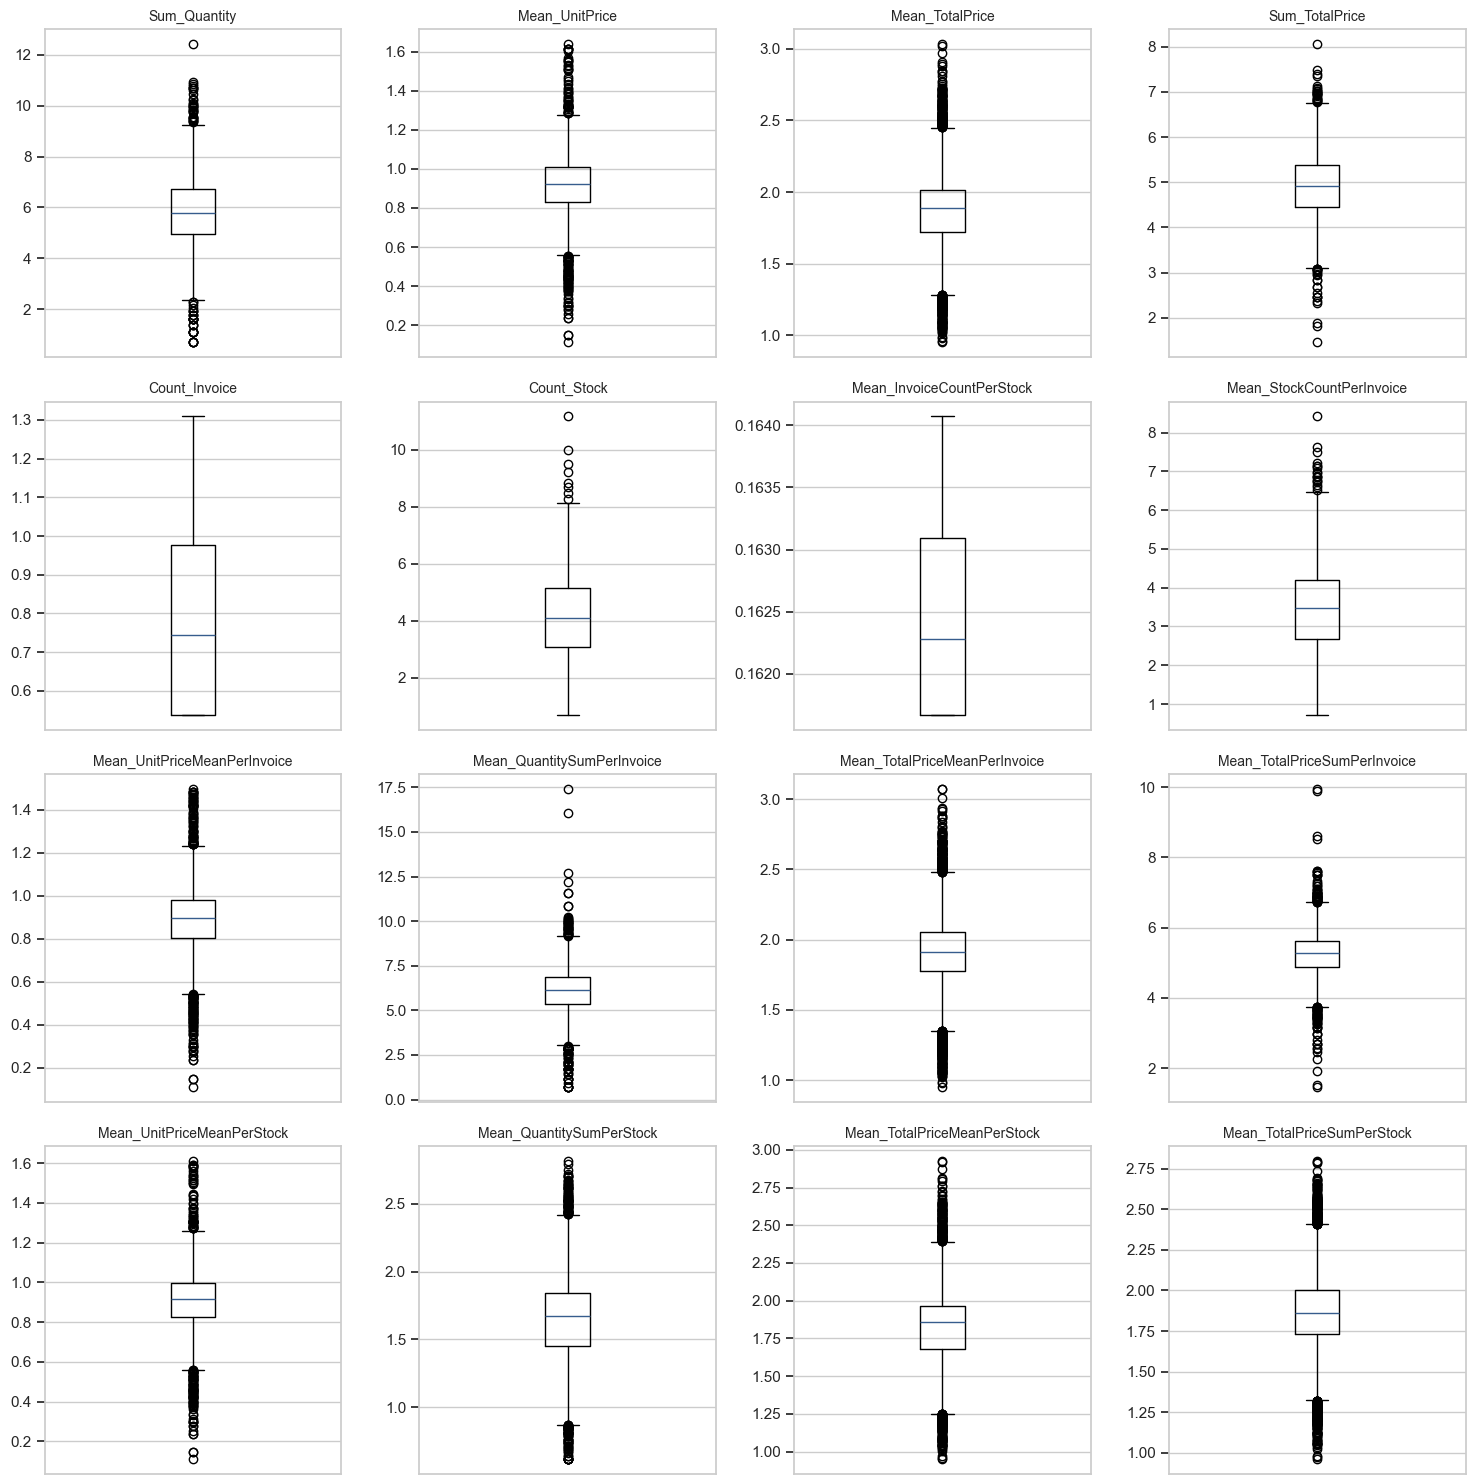

In [9]:
# Trực quan hóa tất cả features sau Box-Cox transformation
engineer.plot_features_boxplots(transformed=True)

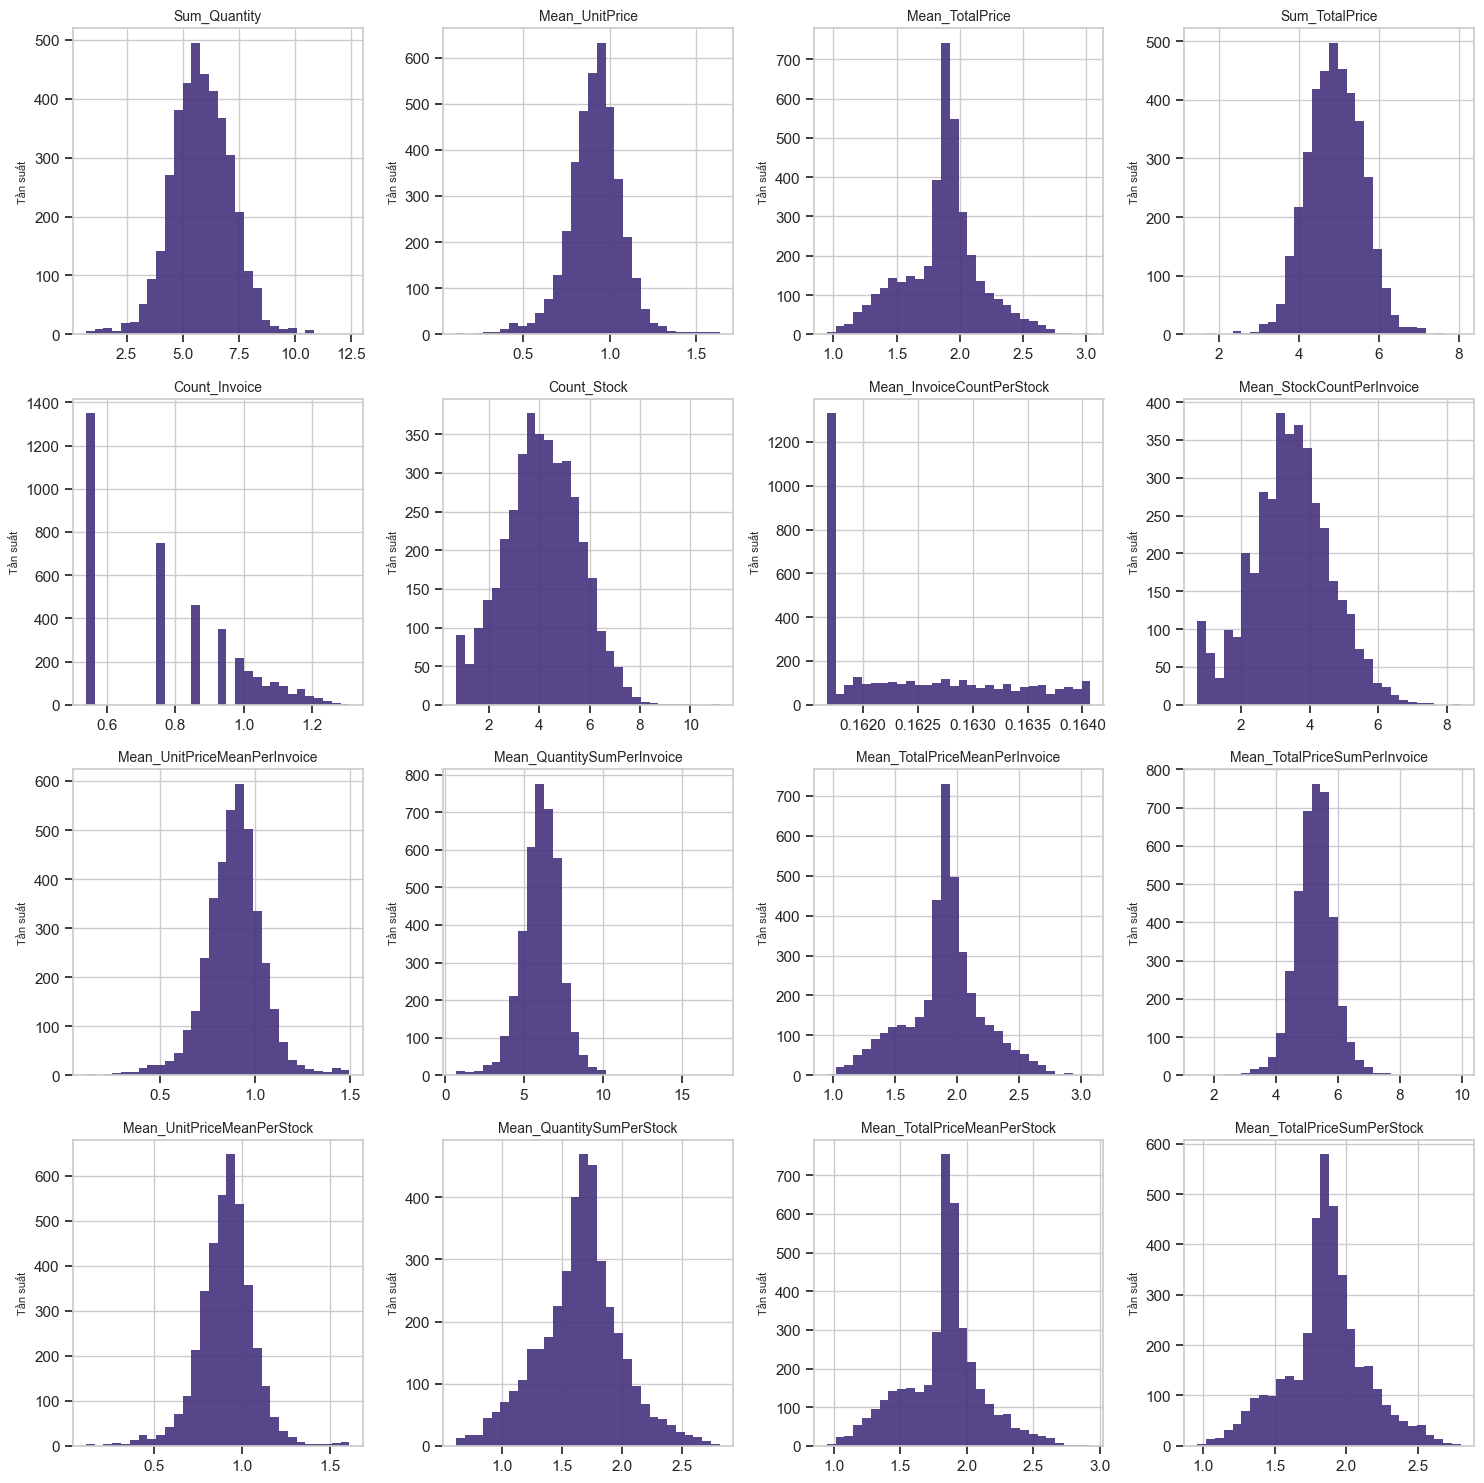

In [10]:
# Trực quan hóa phân phối của features sau Box-Cox transformation bằng histograms
engineer.plot_features_histograms(transformed=True)

## Chuẩn hóa Features

In [11]:
# Áp dụng standardization (mean=0, std=1)
customer_features_scaled = engineer.scale_features()
print(f"Kích thước features đã chuẩn hóa: {customer_features_scaled.shape}")
# display(customer_features_scaled.describe().round(2).loc[['mean', 'std']])
customer_features_scaled.head()

✓ Feature scaling hoàn thành!
Kích thước features đã chuẩn hóa: (3921, 16)


,Sum_Quantity,Mean_UnitPrice,Mean_TotalPrice,Sum_TotalPrice,Count_Invoice,Count_Stock,Mean_InvoiceCountPerStock,Mean_StockCountPerInvoice,Mean_UnitPriceMeanPerInvoice,Mean_QuantitySumPerInvoice,Mean_TotalPriceMeanPerInvoice,Mean_TotalPriceSumPerInvoice,Mean_UnitPriceMeanPerStock,Mean_QuantitySumPerStock,Mean_TotalPriceMeanPerStock,Mean_TotalPriceSumPerStock
CustomerID,,,,,,,,,,,,,,,,
000nan,4.984467,1.506343,-0.268408,4.595722,2.432481,4.773105,2.067962,2.330682,3.094080,0.761335,0.914696,2.100059,2.332104,1.979686,-0.076864,2.392380
012346,3.789233,-2.120154,3.800623,3.161700,-1.158633,-2.296006,-1.015864,-2.307499,-2.100457,8.847780,3.719362,7.377665,-2.141668,3.384916,3.763263,3.337067
012747,0.879252,0.879583,1.007144,1.397472,1.532615,0.156943,1.957285,-0.614124,0.749921,-0.306106,0.973710,0.485241,1.078802,1.041469,0.667948,1.526344
012748,3.038005,-0.106556,-1.068898,2.706127,2.352800,3.983682,1.982065,0.343236,1.872665,-0.238979,-0.080428,-0.710410,-0.049208,0.348309,-0.892187,-0.000881
012749,0.982814,1.125208,0.282588,1.379978,0.890138,1.397000,0.537992,1.095989,1.056342,0.756329,0.259518,1.527988,1.056653,-0.159892,0.290885,0.329836


## Lưu Features đã xử lý

In [12]:
# Lưu các features đã được xử lý để sử dụng cho clustering
engineer.save_features()

print("Tóm tắt kết quả:")
print(f"- Tổng số khách hàng: {customer_features_scaled.shape[0]:,}")
print(f"- Tổng số features: {customer_features_scaled.shape[1]}")
print("- Files đã lưu:")
print("  + customer_features.csv: Features gốc")
print("  + customer_features_transformed.csv: Features đã biến đổi Box-Cox")
print("  + customer_features_scaled.csv: Features đã chuẩn hóa (sẵn sàng cho clustering)")

✓ Đã lưu tất cả features vào: ../data/processed
Tóm tắt kết quả:
- Tổng số khách hàng: 3,921
- Tổng số features: 16
- Files đã lưu:
  + customer_features.csv: Features gốc
  + customer_features_transformed.csv: Features đã biến đổi Box-Cox
  + customer_features_scaled.csv: Features đã chuẩn hóa (sẵn sàng cho clustering)


## Tóm tắt Kỹ thuật tạo Features

**Tạo Features**
- Tạo 16 features ở cấp độ khách hàng nắm bắt các khía cạnh khác nhau của hành vi mua hàng
- Features được tổng hợp ở cấp độ khách hàng từ dữ liệu giao dịch
- Tạo features cho:
  - **Chỉ số cơ bản**: Tổng số lượng, chi tiêu trung bình/tổng, số giao dịch, số sản phẩm
  - **Tổng hợp theo hóa đơn**: Mẫu trung bình mỗi giao dịch
  - **Tổng hợp theo sản phẩm**: Mẫu trung bình mỗi sản phẩm

**Biến đổi dữ liệu**
- Áp dụng Box-Cox transformation để chuẩn hóa phân phối features
- Chuẩn hóa features để có mean bằng 0 và variance bằng 1 sử dụng StandardScaler

**Files đầu ra**
- `customer_features.csv`: Features gốc đã tổng hợp
- `customer_features_transformed.csv`: Features đã biến đổi Box-Cox  
- `customer_features_scaled.csv`: Features đã chuẩn hóa (sẵn sàng cho clustering)